Importing all requirements

In [128]:
#importing all requirements
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
import re
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
from bs4 import BeautifulSoup
from selenium.webdriver.common.keys import Keys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
driver = webdriver.Chrome(executable_path = 'Users/SHIKHAR/Downloads/chromedriver_win32')

C:\Users\SHIKHAR\AppData\Local\Temp\ipykernel_8536\735575394.py:15: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path = 'Users/SHIKHAR/Downloads/chromedriver_win32')


In [129]:
# login to insta handle 

username="dummy"
pw="dummy"

Logging to instagram handle

In [130]:
driver.get('https://www.instagram.com/')
time.sleep(3)
text_box=driver.find_element(By.NAME,"username")
text_box.click()
text_box.send_keys(username)
text_box1=driver.find_element(By.NAME,"password")
text_box1.click()
text_box1.send_keys(pw)
loginbutton = driver.find_element(By.XPATH,'//button[contains(@class,"_acan")]')
loginbutton.submit()
time.sleep(5)
notnow = driver.find_element(By.XPATH,'//button[contains(@class,"_acan")]')
notnow.click()
time.sleep(3)
not_now1= driver.find_element(By.XPATH, '//button[contains(text(), "Not Now")]')
not_now1.click()
# OR  use below to click not now
# not_now = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, '//button[contains(text(), "Not Now")]'))).click()


Extracting the twitter handles after searching "food" in search query

In [138]:
search= driver.find_element(By.XPATH, '//a[contains(@href, "#")]')
search.click()
time.sleep(3)
input_text= driver.find_element(By.XPATH, '//input[contains(@aria-label, "Search input")]')
time.sleep(3)
input_text.click()
time.sleep(3)
input_text.send_keys("food")
time.sleep(3)
result= driver.find_elements(By.XPATH, '//div[contains(@class, "_abm4")]')
results=[]
for element in result:
    data = BeautifulSoup(element.get_attribute('outerHTML'), 'html.parser')
    link="https://www.instagram.com/"+ data.a['href']
    user=data.find_all(class_=("_aacl", "_aaco"," _aacu" ,"_aacy"," _aada"))[2].string
    results.append((user,link))
search= driver.find_element(By.XPATH, '//a[contains(@href, "#")]')
search.click()

In [139]:
#handles extracted
results

[('Food Talk', 'https://www.instagram.com//foodtalkindia/'),
 ('FOOD LOVER😍', 'https://www.instagram.com//foodl.over50/'),
 ('Karan Dua', 'https://www.instagram.com//dilsefoodie/'),
 ('the FBAI', 'https://www.instagram.com//foodbloggerai/'),
 ('Food Lovers Mumbai', 'https://www.instagram.com//foodloversmumbai/'),
 (None, 'https://www.instagram.com//explore/tags/food/'),
 ('Ishita Khajuria💙', 'https://www.instagram.com//foodineerishita/'),
 ('Food', 'https://www.instagram.com//food/'),
 ('Food & Travel | Anika', 'https://www.instagram.com//runaway_foodies/'),
 ('Food Adda', 'https://www.instagram.com//foodadda1/'),
 ('Salonee Sanghvi', 'https://www.instagram.com//foodalong/'),
 ('Foodtech Simplified', 'https://www.instagram.com//foodtechsimplified/'),
 ('Foodie🤤 | vlogger😎', 'https://www.instagram.com//non_vegfoodies/'),
 ('Pune Food Blogger', 'https://www.instagram.com//pune_food_blogger/'),
 ('Fooddiariesss', 'https://www.instagram.com//fooddiariesss/'),
 ('Komal Chawla | Food - Trave

Opening first 10 twitter handles and finding their number of followers

In [143]:
wait = WebDriverWait(driver, 10)
data2=[]
from selenium.common.exceptions import TimeoutException
i=0
for element in results:
    driver.get(element[1])
    #time.sleep(5)
    #follower= driver.find_elements(By.XPATH, '//div[contains(text(), "followers")]')
    try:
        follower= wait.until(EC.presence_of_element_located((By.XPATH, '//div[contains(text(), "followers")]')))
    except TimeoutException:
        continue
    data = BeautifulSoup(follower.get_attribute('outerHTML'), 'html.parser')
    follow=int(data.span['title'].replace(',',''))
    data2.append((follow,element))
    i+=1
    if(i==10):
        break

Insta handles and their followers in decreasing sorted order

In [145]:
data2.sort(reverse=True)
users=[]
followers=[]
for i in data2:
    users.append(i[1][0])
    followers.append(i[0])
    print(i[1][0],i[1][1],i[0])

Karan Dua https://www.instagram.com//dilsefoodie/ 1065991
Food Talk https://www.instagram.com//foodtalkindia/ 309350
Food https://www.instagram.com//food/ 182449
the FBAI https://www.instagram.com//foodbloggerai/ 71032
Food Lovers Mumbai https://www.instagram.com//foodloversmumbai/ 31775
Ishita Khajuria💙 https://www.instagram.com//foodineerishita/ 31716
Food Adda https://www.instagram.com//foodadda1/ 26091
FOOD LOVER😍 https://www.instagram.com//foodl.over50/ 23429
Food & Travel | Anika https://www.instagram.com//runaway_foodies/ 5094
Salonee Sanghvi https://www.instagram.com//foodalong/ 4294


In [147]:
for i in range(10):
    print(users[i],followers[i])

Karan Dua 1065991
Food Talk 309350
Food 182449
the FBAI 71032
Food Lovers Mumbai 31775
Ishita Khajuria💙 31716
Food Adda 26091
FOOD LOVER😍 23429
Food & Travel | Anika 5094
Salonee Sanghvi 4294


Top5 handles follower-wise

In [151]:
top5=data2[:5]

In [150]:
for i in range(5):
    print(users[i],followers[i])

Karan Dua 1065991
Food Talk 309350
Food 182449
the FBAI 71032
Food Lovers Mumbai 31775


Number of posts these handles have done in the previous 3 days.

In [152]:
import re 
wait = WebDriverWait(driver, 10)
numofpost=[]
for ele in top5:
    count=0;
    i=0
    driver.get(ele[1][1])
    posts= wait.until(EC.presence_of_all_elements_located((By.XPATH, '//div[contains(@class, "_aabd")]')))
    time.sleep(3)
    while True:
        if(i==len(posts)):
            break
        posts[i].click()
        #driver.execute_script("arguments[0].click();", posts[i])
        date= wait.until(EC.presence_of_element_located((By.TAG_NAME, 'time')))
        data = BeautifulSoup(date.get_attribute('outerHTML'), 'html.parser').string.strip()
        temp = re.findall(r'\d+', data)
        #print(data,int(temp[0]))
        if('hour' in data or 'sec' in data ):
            count+=1
        elif( ('day' in data or data[-1]=='d') and int(temp[0])<=5 ):
            count+=1
        else:
            driver.back()
            numofpost.append((ele[1][0],count))
            break
        driver.back()
        time.sleep(2)
        i+=1
        
numofpost


[('Karan Dua', 9),
 ('Food Talk', 2),
 ('Food', 0),
 ('the FBAI', 0),
 ('Food Lovers Mumbai', 0)]

In [28]:
top5list=users[:5]
numpostlist=[i[1] for i in numofpost]

['Karan Dua', 'Food Talk', 'Food', 'the FBAI', 'Food Lovers Mumbai']

In [155]:
print("Number of posts in past 5 days")
print("--------------")
for i in range(5):
    print(users[i],numpostlist[i])

Number of posts in past 5 days
--------------
Karan Dua 9
Food Talk 2
Food 0
the FBAI 0
Food Lovers Mumbai 0


Graphical representation of above data

Top 10 users vs followers bar graph

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128153 (\N{BLUE HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


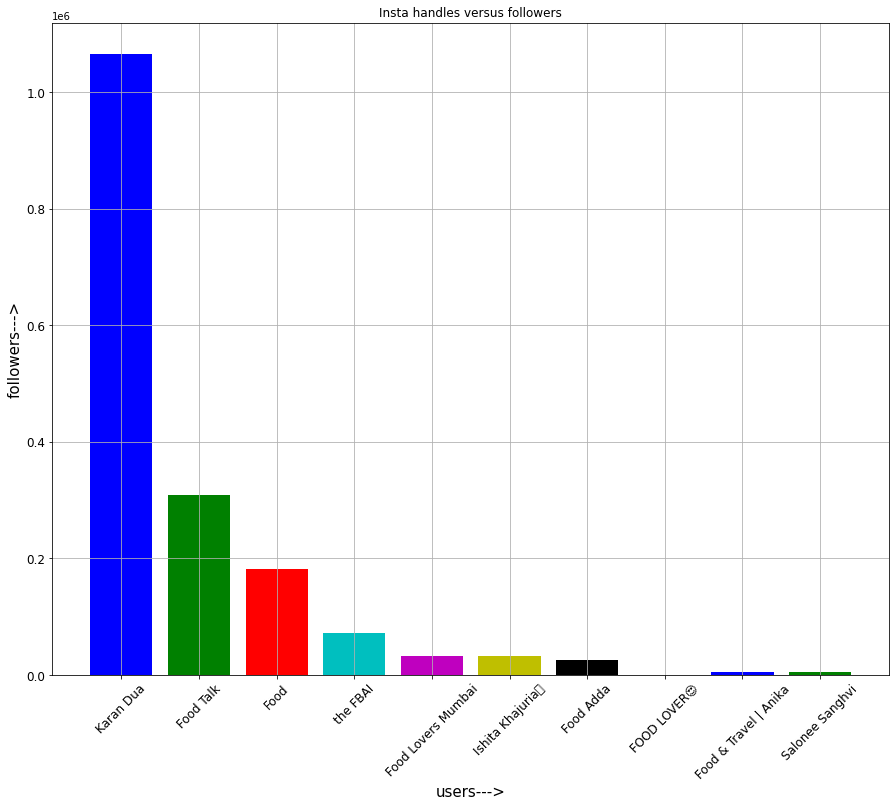

In [160]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


plt.figure(figsize=(15,12 ))
mycolor=["b","g","r","c","m","y","k","w"]
plt.bar(users, followers,color=mycolor)
plt.xticks(rotation=45, size=12)
plt.yticks(size=12)
plt.title('Insta handles versus followers', size=12)
plt.xlabel('users--->', size=15)
plt.ylabel('followers--->', size=15)
plt.grid()
plt.show()


Top 5 users vs number of posts in past 5 days

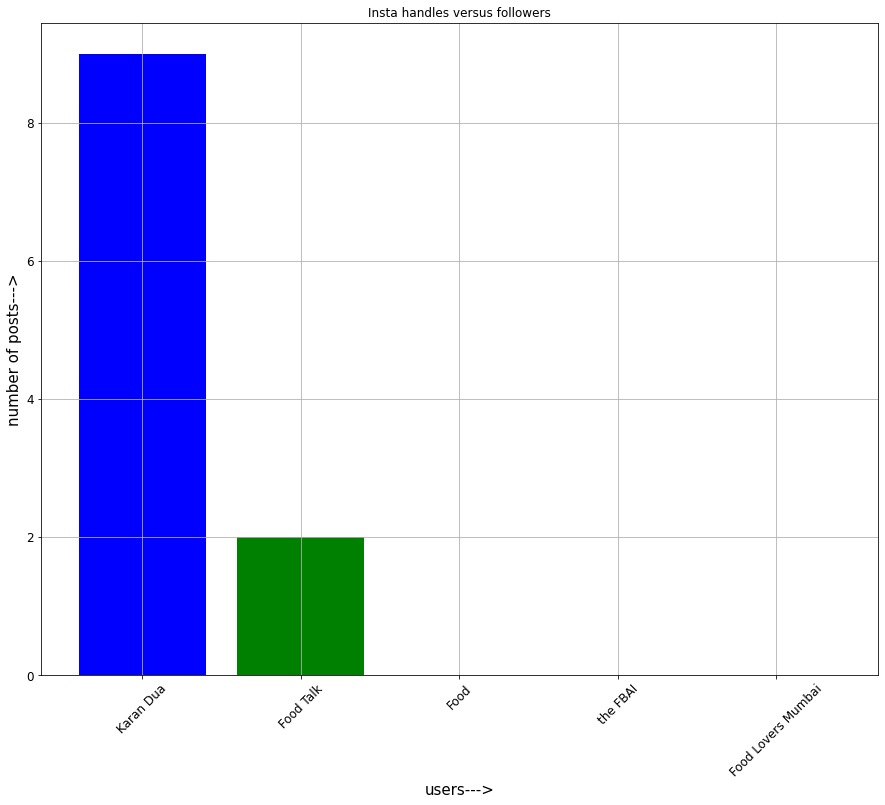

In [161]:
plt.figure(figsize=(15,12 ))
plt.bar(top5list, numpostlist,color=mycolor)
plt.xticks(rotation=45, size=12)
plt.yticks(size=12)
plt.title('Insta handles versus followers', size=12)
plt.xlabel('users--->', size=15)
plt.ylabel('number of posts--->', size=15)
plt.grid()
plt.show()

Opening the top 5 handles and scraping the content and hastags of the first 10 posts of each handle.

In [163]:
content=[]
hypertext=[]
for ele in top5:
    i=0
    driver.get(ele[1][1])
    posts= wait.until(EC.presence_of_all_elements_located((By.XPATH, '//div[contains(@class, "_aabd")]')))
    time.sleep(3)
    while True:
        if(i==10):
            break
        posts[i].click()
        #driver.execute_script("arguments[0].click();", posts[i])
        cont= wait.until(EC.presence_of_element_located((By.XPATH, '//div[contains(@class, "_a9zs")]/span[contains(@class, "_aacl")]')))
        content.append(cont.get_attribute('textContent'))
        try:
            hyper= wait.until(EC.presence_of_all_elements_located((By.XPATH, '//div[contains(@class, "_a9zs")]/span[contains(@class, "_aacl")]//a')))
        except TimeoutException:
            driver.back()
            time.sleep(2)
            i+=1
            continue
        for h in hyper:
            hypertext.append(h.get_attribute('textContent'))
        driver.back()
        time.sleep(2)
        i+=1


In [166]:
#content of posts extracted
print("total posts :",len(content))
print("-----------------------------")
for ele in content:
    print(ele)
    print("-------------------------------------------------------------------------------------------------------------------")

total posts : 50
-----------------------------
These Packets Are Getting Ready For Franchises Shops Of Puran Singh Ka Mashhoor Dhaba, Ambala They Sell Frozen Ready To Eat Mutton Curry To All The Branches. #dilsefoodie #puransinghdhaba #muttoncurry
-------------------------------------------------------------------------------------------------------------------
Ye Hai Pyaar Or Vaar ?? Amritsar Kesar Da Dhaba 😂 #dilsefoodie #amritsarfood #desigheeparantha #kesardadhaba
-------------------------------------------------------------------------------------------------------------------
West Delhi's Best Place For Buffet At @sandozbbq Tag All Your West Delhi People And Try This. #dilsefoodie #dilsecouple #sandozbbq #buffet
-------------------------------------------------------------------------------------------------------------------
At The Paul Cafe, Dubai Mall #dilsefoodie #dilsecouple #reel #dubaifood
------------------------------------------------------------------------------------

Preparing a list of all words used in all the scraped posts and calculating the frequency of each word.

In [168]:
#list of words used in posts
words=[]
for ele in content:
    words=words+ele.split()
    
print("total words:",len(words))
    

total words: 2509


In [187]:
#creating the dictionary of words and their frequency
worddict=dict()
for ele in words:
    worddict[ele]=worddict.get(ele,0)+1


In [189]:
print("total distinct words:" , len(worddict))

total distinct words: 1427


In [190]:
#creating the dictionary in descending order
keys = list(worddict.keys())
values = list(worddict.values())
sorted_value_index = np.argsort(values)[::-1]
sorted_words = {keys[i]: values[i] for i in sorted_value_index}
sorted_words

{'and': 82,
 'the': 81,
 'to': 53,
 'of': 35,
 'a': 32,
 'in': 31,
 'is': 28,
 'at': 25,
 'with': 24,
 'for': 24,
 'this': 21,
 'from': 17,
 '-': 17,
 'The': 17,
 'your': 16,
 'food': 12,
 'our': 12,
 '#delicious': 11,
 '#yummy': 11,
 'be': 11,
 'you': 11,
 'their': 11,
 '#foodiesofindia': 10,
 '#foodblogger': 10,
 '#instafood': 10,
 'are': 10,
 '#foodtalkindia': 10,
 '#discover': 10,
 '#dilsefoodie': 10,
 '&': 9,
 '#food': 9,
 'it': 9,
 'some': 8,
 'has': 7,
 'was': 7,
 'more': 7,
 'on': 7,
 'have': 7,
 '#eat': 6,
 'list': 6,
 'service': 6,
 'an': 6,
 'new': 6,
 'these': 6,
 'over': 6,
 'as': 6,
 'holiday': 6,
 'Chocolate': 6,
 'all': 5,
 'but': 5,
 'available': 5,
 '#dilsecouple': 5,
 'At': 5,
 'season': 5,
 'meal': 5,
 'favourite': 5,
 'up': 5,
 'we': 5,
 'seeds': 4,
 'cocktails,': 4,
 'For': 4,
 'experience': 4,
 'which': 4,
 'delicious': 4,
 'And': 4,
 'will': 4,
 'Delhi': 4,
 'Mexican': 4,
 'years': 4,
 'only': 4,
 'share': 4,
 'winter': 4,
 '#newyorkcity': 4,
 'been': 4,
 'must'

a csv file with two columns : the word and its frequency

In [191]:
keys = list(sorted_words.keys())
values = list(sorted_words.values())
df=pd.DataFrame()
df['Popular words']=keys
df['frequency']=values
df.to_csv('words_and_freq.csv')

finding hashtags that were most popular among these bloggers

In [192]:
print("total hypertext :" , len(hypertext))

total hypertext : 410


In [193]:
# creating a dictionary of hastags and frequency
hashtags=dict()
for ele in hypertext:
    if ele[0]=='@':
        continue
    hashtags[ele]=hashtags.get(ele,0)+1
    

In [195]:
print(" distinct hastags :",len(hashtags))
hashtags


 distinct hastags : 216


{'#dilsefoodie': 10,
 '#puransinghdhaba': 1,
 '#muttoncurry': 1,
 '#amritsarfood': 1,
 '#desigheeparantha': 1,
 '#kesardadhaba': 1,
 '#dilsecouple': 5,
 '#sandozbbq': 1,
 '#buffet': 1,
 '#reel': 1,
 '#dubaifood': 1,
 '#food': 9,
 '#golgappe': 1,
 '#misalpav': 1,
 '#mumbai': 4,
 '#cholekulche': 1,
 '#streetfood': 1,
 '#christmas': 2,
 '#pizza': 1,
 '#wine': 1,
 '#meat': 1,
 '#chicken': 1,
 '#NYE': 1,
 '#party': 1,
 '#drinks': 1,
 '#foodtalkindia': 10,
 '#foodiesofindia': 10,
 '#foodblogger': 10,
 '#delicious': 11,
 '#yummy': 11,
 '#instafood': 10,
 '#discover': 10,
 '#hotsauces': 1,
 '#fiery': 1,
 '#bomb': 1,
 '#sauces': 1,
 '#snacks': 1,
 '#ginexplorersclub': 2,
 '#GinOClock': 3,
 '#bengaluru': 3,
 '#gin': 2,
 '#mythicaledition': 2,
 '#holidayretreat': 1,
 '#nye': 1,
 '#newyear': 1,
 '#mountains': 1,
 '#homestays': 1,
 '#pickles': 1,
 '#homegrown': 1,
 '#homemade': 1,
 '#organic': 1,
 '#NewInTown': 1,
 '#dyavol': 1,
 '#vodka': 1,
 '#aryankhan': 1,
 '#newlaunch': 3,
 '#delhi': 1,
 '#win

In [196]:
#creating the dictionary in descending order
keys = list(hashtags.keys())
values = list(hashtags.values())
sorted_value_index = np.argsort(values)[::-1]
sorted_hashtags = {keys[i]: values[i] for i in sorted_value_index}
sorted_hashtags

{'#yummy': 11,
 '#delicious': 11,
 '#dilsefoodie': 10,
 '#foodtalkindia': 10,
 '#discover': 10,
 '#instafood': 10,
 '#foodiesofindia': 10,
 '#foodblogger': 10,
 '#food': 9,
 '#eat': 6,
 '#dilsecouple': 5,
 '#mumbai': 4,
 '#newyorkcity': 4,
 '#GinOClock': 3,
 '#bengaluru': 3,
 '#newlaunch': 3,
 '#holidays': 3,
 '#foodnews': 3,
 '#gin': 2,
 '#ginexplorersclub': 2,
 '#ToASeminar': 2,
 '#cuisine': 2,
 '#Sindhi': 2,
 '#mythicaledition': 2,
 '#GoVisit': 2,
 '#baking': 2,
 '#winterspecial': 2,
 '#menus': 2,
 '#restaurants': 2,
 '#holidayseason': 2,
 '#restaurant': 2,
 '#bar': 2,
 '#foodart': 2,
 '#christmas': 2,
 '#cocktails': 2,
 '#TasteofAmerica': 2,
 '#newbar': 2,
 '#dining': 2,
 '#hamburger': 1,
 '#christmasiscoming': 1,
 '#foodscene': 1,
 '#winter': 1,
 '#waffles': 1,
 '#cakes': 1,
 '#mexicanrestaurant': 1,
 '#miniwaffles': 1,
 '#piecaken': 1,
 '#goldbelly': 1,
 '#festive': 1,
 '#proteinwaffles': 1,
 '#wafflehouse': 1,
 '#miniwafflemaker': 1,
 '#mexicanfood': 1,
 '#freezing': 1,
 '#mezca

a csv file with two columns : the hashtags and its frequency

In [197]:
keys = list(sorted_hashtags.keys())
values = list(sorted_hashtags.values())
df=pd.DataFrame()
df['Popular Hashtags']=keys
df['frequency']=values
df.to_csv('hashtag_and_freq.csv')

top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

In [198]:
#top 5 hashtags and it's frequency
for i in range(5):
    print(keys[i],values[i])

#yummy 11
#delicious 11
#dilsefoodie 10
#foodtalkindia 10
#discover 10


Pie Chart of the top 5 hashtags obtained 

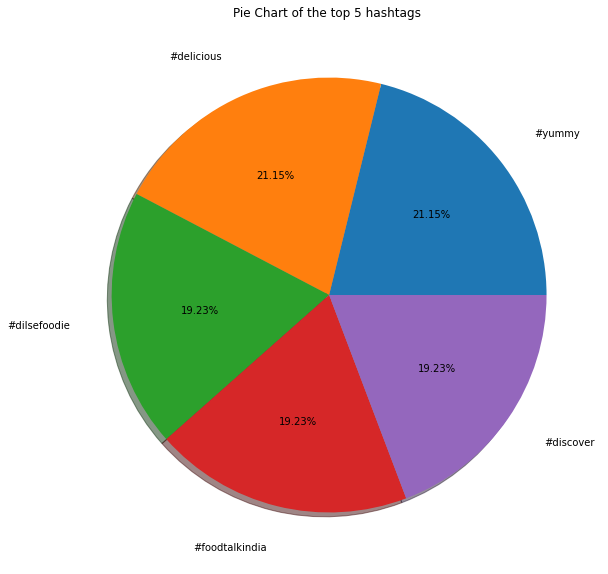

In [199]:
x=keys[:5]
y=values[:5]
plt.figure(figsize=(10, 10))
plt.pie(y, labels=x, autopct='%.2f%%', shadow=True, labeldistance=1.2)
plt.title('Pie Chart of the top 5 hashtags ')
plt.show()

average followers : likes ratio for the obtained handles.                                   

In [115]:
#scrapping the total numbers of likes on recent 10 posts for top 5 handles
likes=[]
for ele in top5:
    i=0
    driver.get(ele[1][1])
    posts= wait.until(EC.presence_of_all_elements_located((By.XPATH, '//div[contains(@class, "_aabd")]')))
    time.sleep(3)
    count=0
    while True:
        if(i==10 or i==len(posts)):
            break
        posts[i].click()
        #driver.execute_script("arguments[0].click();", posts[i])
        try:
            cont= wait.until(EC.presence_of_element_located((By.XPATH, '//div[contains(text(),"likes")]/span')))
        except TimeoutException:
            driver.back()
            time.sleep(2)
            i+=1
            continue
        i+=1
        string=cont.get_attribute('innerHTML')
        temp = string.replace(',','')
        count+=int(temp)
        driver.back()
        time.sleep(2)
    likes.append(count)

In [200]:
likes

[98548, 1686, 3737, 6281, 1235]

In [201]:
print("users",":","likes")
print("----------------")
for i in range(5):
    print(users[i],likes[i])


users : likes
----------------
Karan Dua 98548
Food Talk 1686
Food 3737
the FBAI 6281
Food Lovers Mumbai 1235


In [202]:
#calculating average likes
nplike=np.array(likes)
averagelike=nplike/10
averagelike

array([9854.8,  168.6,  373.7,  628.1,  123.5])

In [122]:
npfollower=np.array(followers[:5])
npfollower

array([1065954,  309364,  182451,   71032,   31775])

In [203]:
#calculating follower like ratio
follower_like_ratio=npfollower/averagelike
follower_like_ratio


array([ 108.16596988, 1834.89916963,  488.22852556,  113.09027225,
        257.28744939])

In [205]:
print("users",":","ratio")
print("----------------")
for i in range(5):
    print(users[i]," ",follower_like_ratio[i])


users : ratio
----------------
Karan Dua   108.16596988269677
Food Talk   1834.8991696322657
Food   488.2285255552582
the FBAI   113.09027224964177
Food Lovers Mumbai   257.2874493927126


a bar graph to depict the above obtained information.

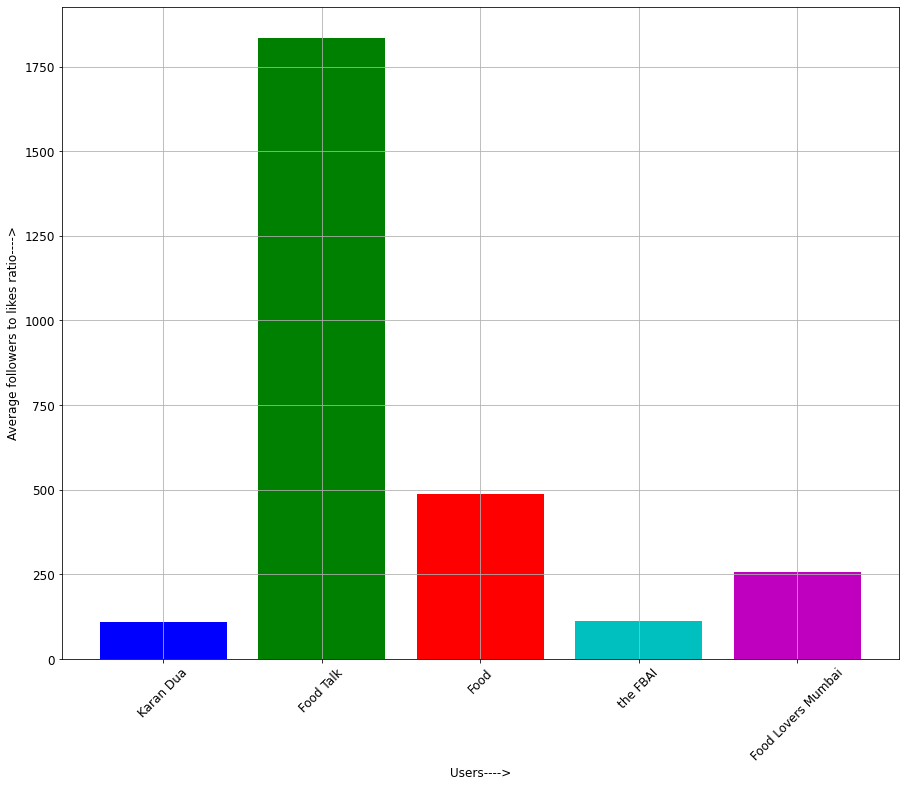

In [207]:
plt.figure(figsize=(15,12))

plt.bar(users[0:5], follower_like_ratio,color=mycolor)
plt.xticks(rotation=45, size=12)
plt.xlabel('Users---->', size=12)
plt.ylabel('Average followers to likes ratio---->', size=12)
plt.yticks(size=12)
plt.grid()
plt.show()
